In [40]:
import os

In [41]:
os.chdir("../scripts")

In [57]:
from load_data import load_data
from importlib import reload
import risk_difference_accross_province as rdap
import risk_difference_bn_postalcodes as rdbp
import margin_differences_bn_postalcode as mdbp
import risk_differences_bn_gender as rdbg
import visualization_task_3 as vt3

In [43]:
data = load_data()
data = data.dropna(subset=['TotalClaims', 'TotalPremium'])

/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-3/scripts/load_data.py:4: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../datas/MachineLearningRating_v3.txt', delimiter='|')


## Risk Differences Across Provinces:

In [44]:
reload(rdap)

anova_result1 = rdap.risk_difference_accross_province(data)

print(f"ANOVA test result for risk differences across provinces: p-value = {anova_result1.pvalue}")

Province
Eastern Cape     57.973423
Free State       33.221179
Gauteng          76.141956
KwaZulu-Natal    95.345964
Limpopo          47.888198
Mpumalanga       47.037782
North West       52.979745
Northern Cape     0.871620
Western Cape     60.526472
Name: TotalClaims, dtype: float64
ANOVA test result for risk differences across provinces: p-value = 0.013564217762825095


## Risk Differences Between Portal Codes

In [45]:
reload(rdbp)
anova_result2 = rdbp.risk_difference_bn_postalcodes(data)
print(f"ANOVA test result for risk differences between postal codes: p-value = {anova_result2.pvalue}")


PostalCode
1       138.232873
2       276.273653
4         0.000000
5       207.378816
6         6.396199
           ...    
9750      0.000000
9762      0.000000
9781    211.552466
9869      2.171691
9870      0.000000
Name: TotalClaims, Length: 659, dtype: float64
ANOVA test result for risk differences between postal codes: p-value = 0.9735197678716819


## Margin Differences between postal codes

In [46]:
reload(mdbp)
anova_result3 = mdbp.margin_differences_bn_postalcode(data)

print(f"ANOVA test result for margin differences between postal codes: p-value = {anova_result3.pvalue}")

PostalCode
1       -45.336776
2      -222.006446
4       113.947737
5      -145.725189
6        15.710634
           ...    
9750     74.648763
9762     96.217756
9781   -161.789509
9869     48.473766
9870     80.469292
Name: Margin, Length: 659, dtype: float64
ANOVA test result for margin differences between postal codes: p-value = 0.9748561889967275


In [47]:
reload(rdbg)
t_test_result = rdbg.risk_differences_bn_gender(data)

print(f"T-test result for risk differences between women and men: p-value = {t_test_result.pvalue}")

Gender
Male             77.982233
Not specified    70.396136
Name: TotalClaims, dtype: float64
T-test result for risk differences between women and men: p-value = 0.8381884345448333


In [48]:
def analyze_results(p_value, hypothesis):
    if p_value < 0.05:
        print(f"Reject the null hypothesis: {hypothesis}")
    else:
        print(f"Fail to reject the null hypothesis: {hypothesis}")

# Example usage
analyze_results(anova_result1.pvalue, "There are no risk differences across provinces")
analyze_results(anova_result2.pvalue, "There are no risk differences between postal codes")
analyze_results(anova_result3.pvalue, "There are no significant margin differences across postal codes")
analyze_results(t_test_result.pvalue, "There are no significant risk differences between women and men")

Reject the null hypothesis: There are no risk differences across provinces
Fail to reject the null hypothesis: There are no risk differences between postal codes
Fail to reject the null hypothesis: There are no significant margin differences across postal codes
Fail to reject the null hypothesis: There are no significant risk differences between women and men


## Total Claims Across Provinces


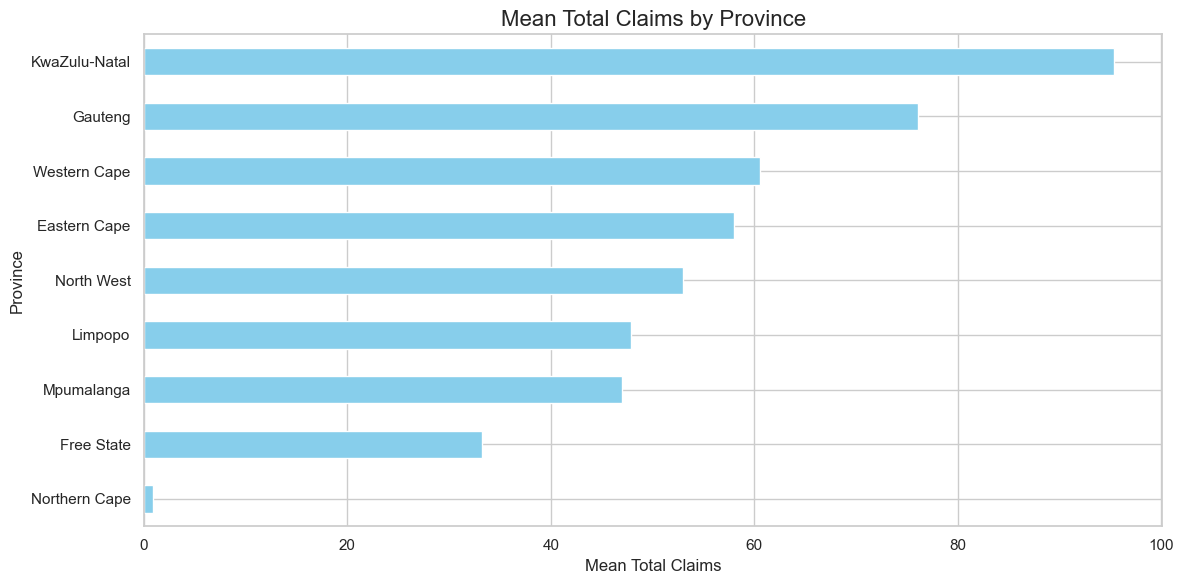

In [59]:
reload(vt3)
vt3.mean_totalClaims_by_province(data)

## Claims Across Postal Codes

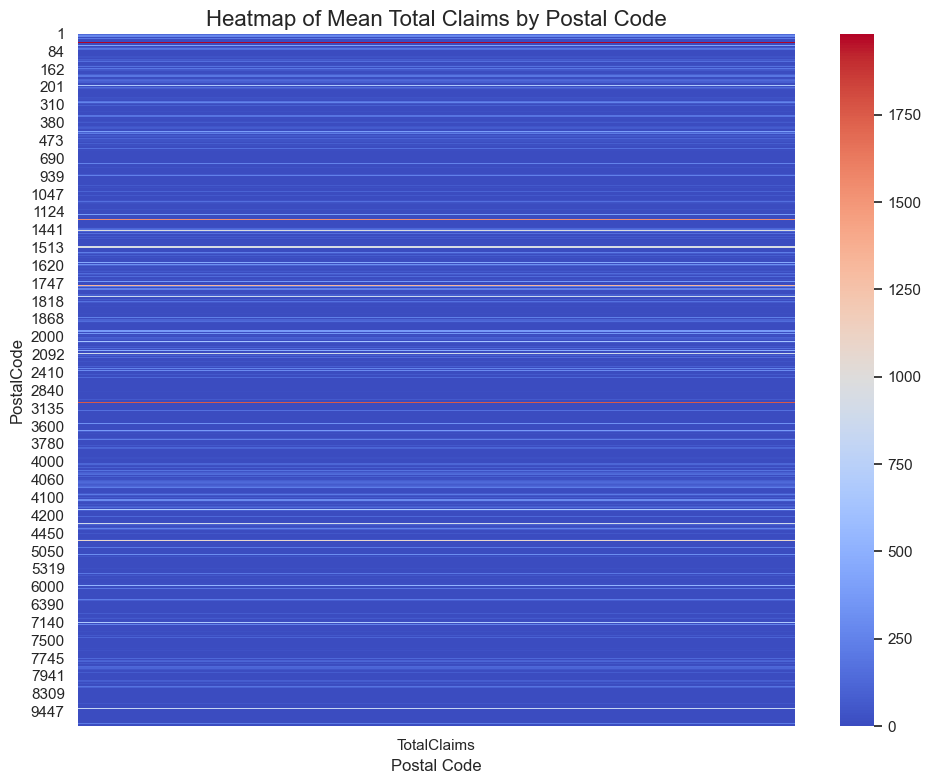

In [61]:
reload(vt3)
vt3.pivot_table_postal_heatmap(data)

## Gender-Based Risk Differences


/home/teddy/Desktop/Kifya journey/Kifiya-AIM-Week-3/scripts/visualization_task_3.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='TotalClaims', data=data, palette="Set2")


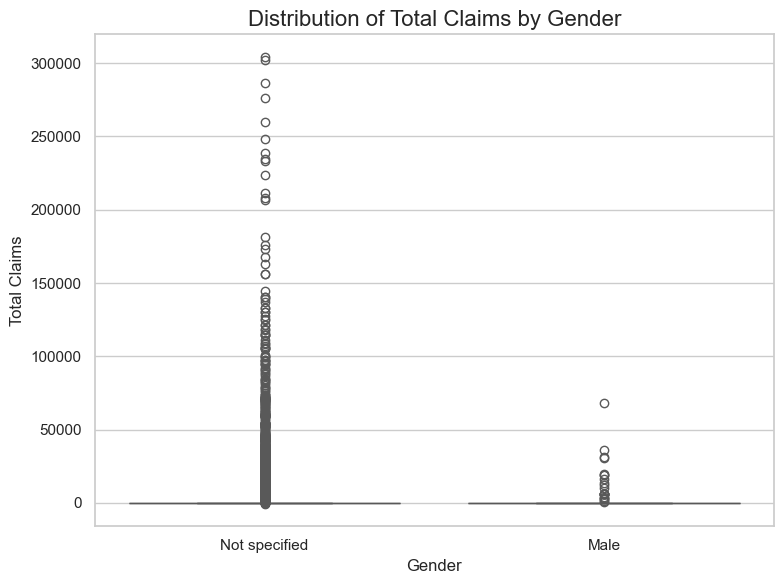

In [63]:
reload(vt3)

vt3.distribution_of_totalClaims_by_gender(data)

## Margin Differences by Postal Code (scatter plot)


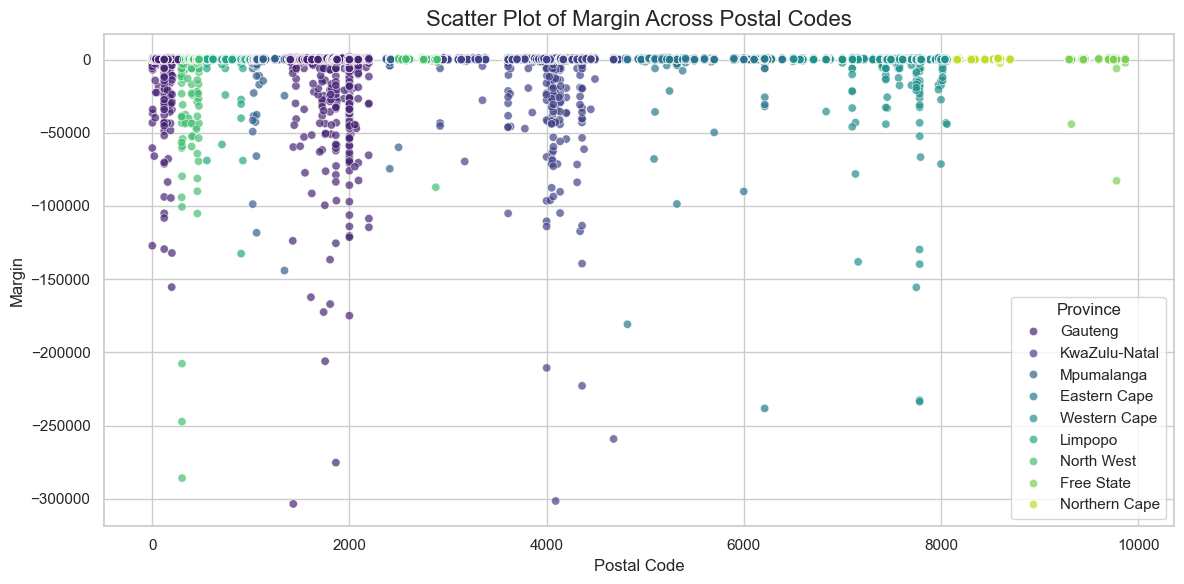

In [65]:
reload(vt3)

vt3.margin_differences_by_postalCode(data)

## Risk Differences Across Provinces

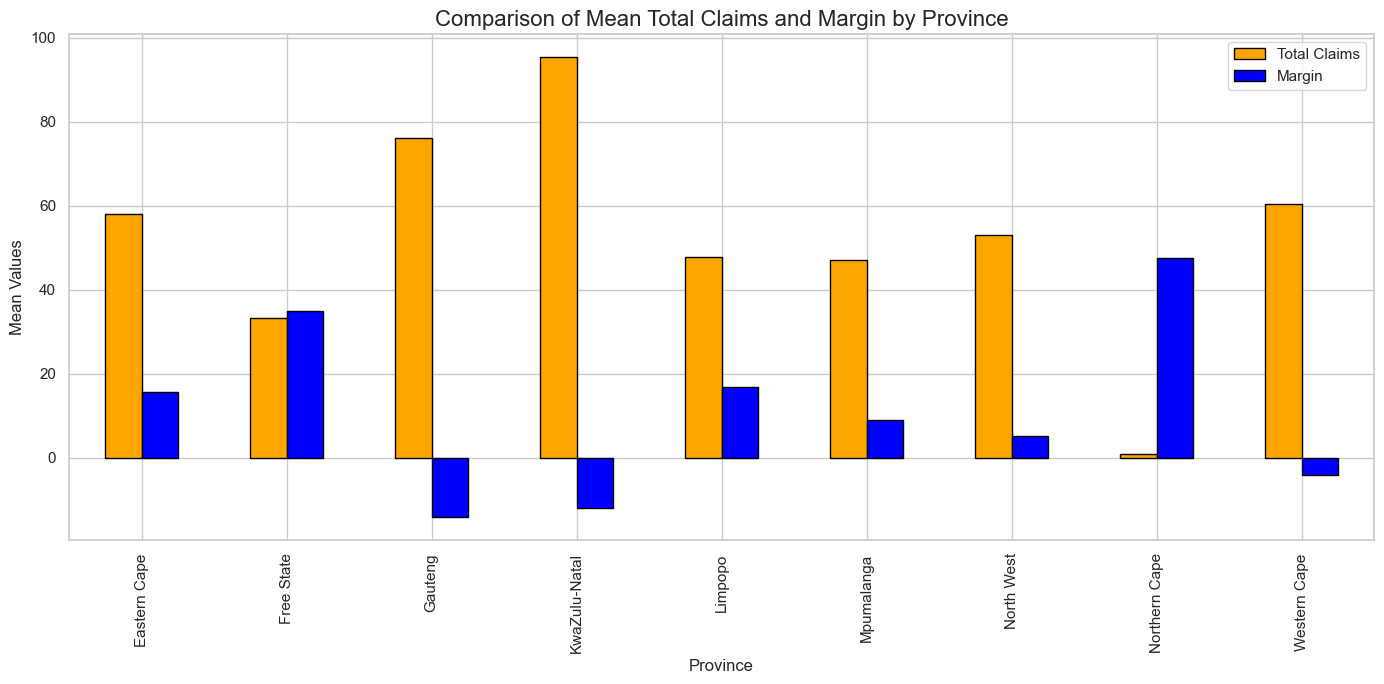

In [67]:
reload(vt3)
vt3.Risk_Differences_Across_Provinces(data)

## Correlation Matrix for Numerical Columns


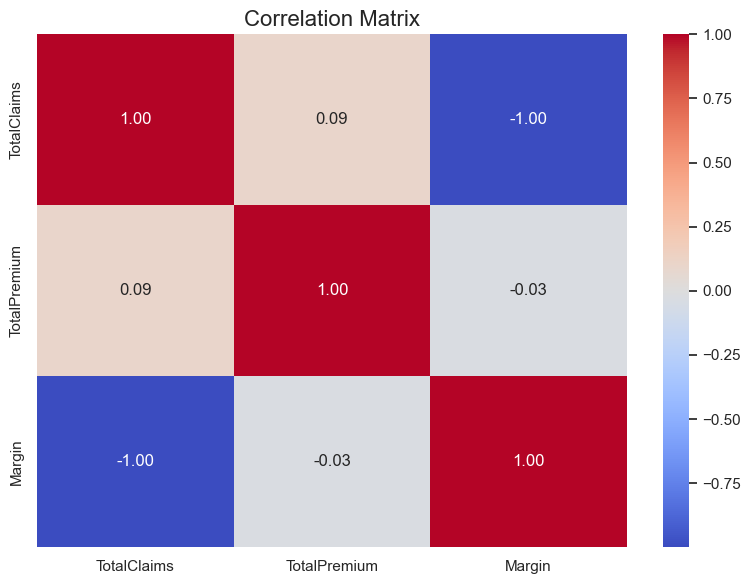

In [69]:
reload(vt3)

vt3.correlationMatrix(data)

## Total Premium vs. Total Claims by Province

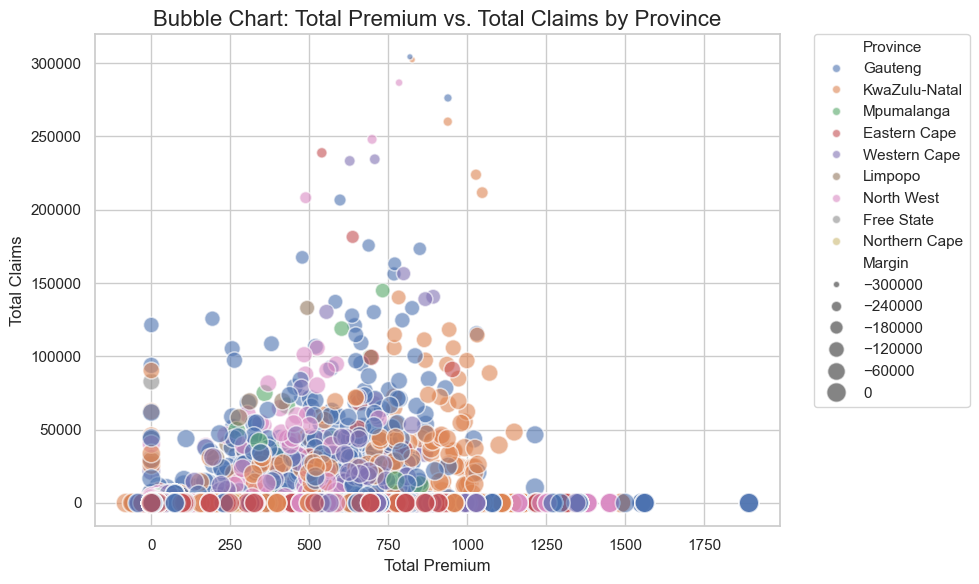

In [71]:
reload(vt3)

vt3.totalPremium_vs_totalClaims(data)

## Distribution of Margins


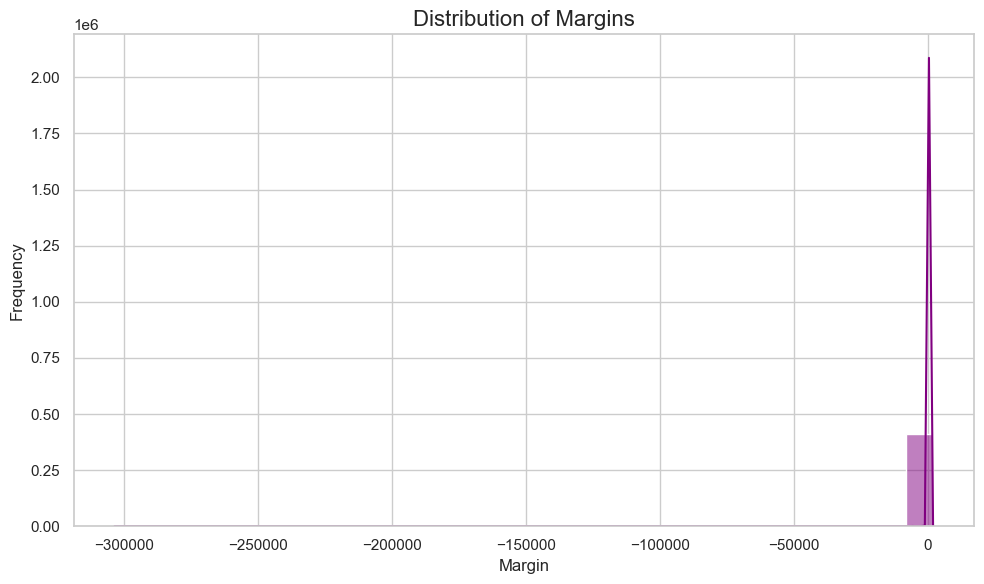

In [73]:
reload(vt3)

vt3.distribution_of_margins(data)